In [ ]:
#import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import glob
import os
import cv2

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Model

: 

In [11]:
#direct to google drive respiratory 
from google.colab import drive
drive.mount('/content/drive')

KeyError: 'CLOUDSDK_CONFIG'

In [ ]:
# read labels of all images
label = pd.read_csv("drive/MyDrive/STATS302_FINAL_PROJECT/final_label_2.csv")
label = np.array(label['tag']).reshape(len(label),1)
label = label.tolist()

In [ ]:
# paths of all images
path_original = "drive/MyDrive/STATS302_FINAL_PROJECT/final_segment_images"
path_without = "drive/MyDrive/STATS302_FINAL_PROJECT/without_final"
path_incorrect = "drive/MyDrive/STATS302_FINAL_PROJECT/incorrect_final"

In [ ]:
#combination of all paths
path1 = glob.glob(os.path.join(path_original, '*.png'))
path1

path2 = glob.glob(os.path.join(path_without, '*.png'))
path2
path = path1 + path2

path3 = glob.glob(os.path.join(path_incorrect, '*.png'))
path3
path = path + path3

In [ ]:
# read all images in the order of orignial dataset, faces without masks and faces wearing masks incorrectly
# convert all images into numpy arrays
# the final dataset will be in shape (2087,128,128,3)
count=0
img_list = []
for file in path:
  img = cv2.imread(file)
  print(count)
  img = (img/255.0)
  img_list.append(img)
  count += 1
img_list = np.array(img_list)
img_list

In [ ]:
img_list.shape

(2087, 128, 128, 3)

In [ ]:
# split training and test set in proportion 30% - 70%
X = img_list
y = np.array(label)
train_images, test_images, train_labels, test_labels = train_test_split(X, y, test_size=0.3, random_state=42)
print(len(train_images))
print(test_images.shape)
print(len(train_labels))
print(test_labels.shape)
# test_images

1460
(627, 128, 128, 3)
1460
(627, 1)


In [ ]:
class_names = ['without_mask', 'with_mask', 'mask_weared_incorrect']

In [ ]:
# Build the CNN Model with three convolution layers, one pooling layer of maxpool and activation function of ReLU
model = models.Sequential()
model.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))

In [ ]:
# Summarize strucure of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 128)     3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 256)       295168    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 256)       590080    
Total params: 888,832
Trainable params: 888,832
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#flatten the data and import into dense layers.
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(3))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 128)     3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 256)       295168    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 256)       590080    
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0         
_________________________________________________________________
dense (Dense)                (None, 256)               5

In [ ]:
#Train the CNN model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
46/46 [==============================] - 310s 7s/step - loss: 1.1669 - accuracy: 0.7199 - val_loss: 0.1937 - val_accuracy: 0.9346
Epoch 2/10
46/46 [==============================] - 309s 7s/step - loss: 0.2724 - accuracy: 0.9199 - val_loss: 0.2225 - val_accuracy: 0.9282
Epoch 3/10
46/46 [==============================] - 308s 7s/step - loss: 0.2373 - accuracy: 0.9240 - val_loss: 0.1516 - val_accuracy: 0.9474
Epoch 4/10
46/46 [==============================] - 307s 7s/step - loss: 0.2138 - accuracy: 0.9377 - val_loss: 0.1669 - val_accuracy: 0.9506
Epoch 5/10
46/46 [==============================] - 307s 7s/step - loss: 0.1951 - accuracy: 0.9336 - val_loss: 0.1619 - val_accuracy: 0.9410
Epoch 6/10
46/46 [==============================] - 309s 7s/step - loss: 0.1879 - accuracy: 0.9390 - val_loss: 0.1201 - val_accuracy: 0.9601
Epoch 7/10
46/46 [==============================] - 307s 7s/step - loss: 0.1512 - accuracy: 0.9452 - val_loss: 0.1473 - val_accuracy: 0.9506
Epoch 8/10
46

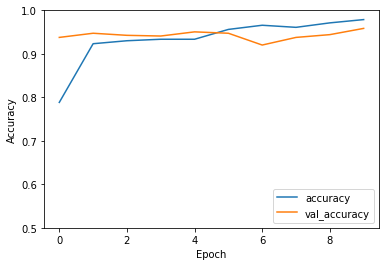

20/20 - 36s - loss: 0.1713 - accuracy: 0.9585


In [ ]:
#plot the changes in accuracy in training
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(test_images)

In [ ]:
result = tf.nn.softmax(y_pred[3])
y_pred_list = []
for i in y_pred:
  y_pred_list.append([np.argmax(i)])
y_pred_list = np.array(y_pred_list)

In [ ]:
#calculate the accuracy
accuracy = accuracy_score(test_labels, y_pred_list)
accuracy

0.9186602870813397

In [ ]:
#construct the confusion matrix
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(test_labels, y_pred_list)
matrix

array([[137,   4,  12],
       [  6, 250,   7],
       [ 15,   7, 189]])

In [ ]:
#define a funcation that could draw confusion matrix
def plot_confusion_matrix(cm, labels_name, title):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]   
    plt.imshow(cm, interpolation='nearest')   
    plt.title(title)    
    plt.colorbar()
    num_local = np.array(range(len(labels_name)))    
    plt.xticks(num_local, labels_name, rotation=90)    
    plt.yticks(num_local, labels_name)    
    plt.ylabel('True label')    
    plt.xlabel('Predicted label')

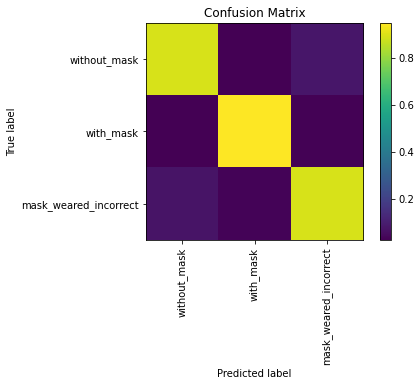

In [ ]:
#draw the confusion matrix plot
plot_confusion_matrix(matrix, class_names, "Confusion Matrix")
# plt.savefig('/HAR_cm.png', format='png')
plt.show()